<a href="https://colab.research.google.com/github/2303A51272/ADM-Lab/blob/main/ADM_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
file_path = "Amazon.csv"
df = pd.read_csv(file_path)


In [3]:
def clean_price_column(column):
      return pd.to_numeric(column.str.replace('₹', '').str.replace(',', '').astype(str), errors='coerce')

In [4]:
df['discounted_price'] = clean_price_column(df['discounted_price'])
df['actual_price'] = clean_price_column(df['actual_price'])
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'].str.replace('%', ''), errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')

In [5]:
df_cleaned = df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].dropna()



In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)



In [9]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


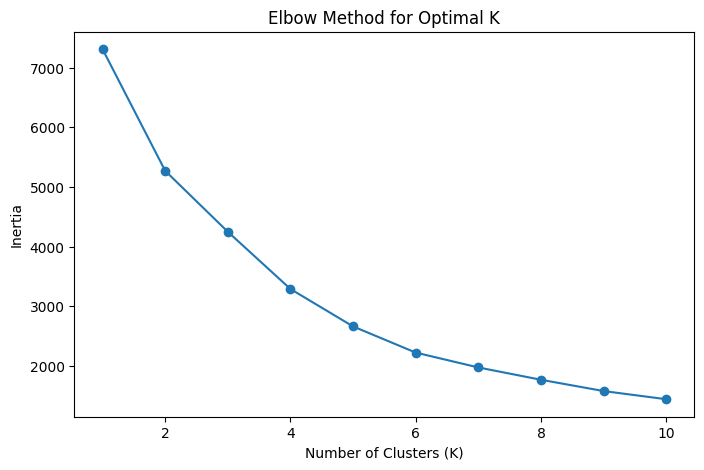

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [11]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned['cluster'] = kmeans.fit_predict(df_scaled)

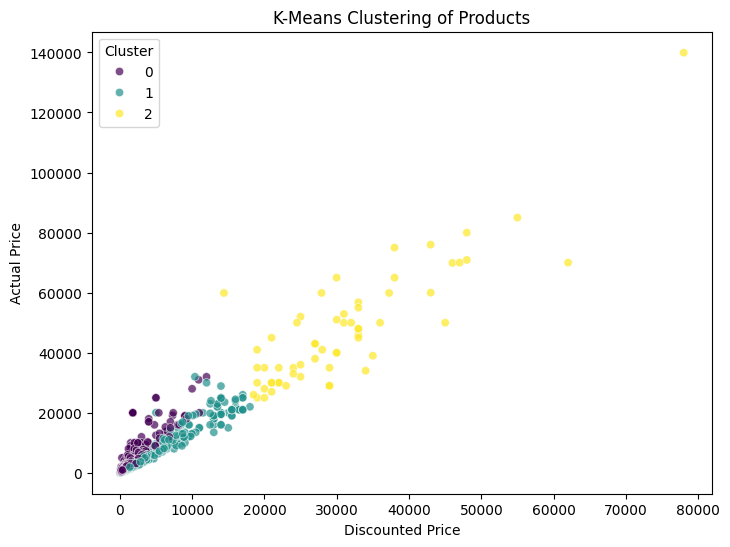

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['discounted_price'],
                y=df_cleaned['actual_price'],
                hue=df_cleaned['cluster'],
                palette='viridis', alpha=0.7)
plt.xlabel("Discounted Price") # Corrected indentation
plt.ylabel("Actual Price") # Corrected indentation
plt.title("K-Means Clustering of Products") # Corrected indentation
plt.legend(title="Cluster") # Corrected indentation
plt.show() # Corrected indentation

In [14]:
linked = linkage(df_scaled, method='ward')

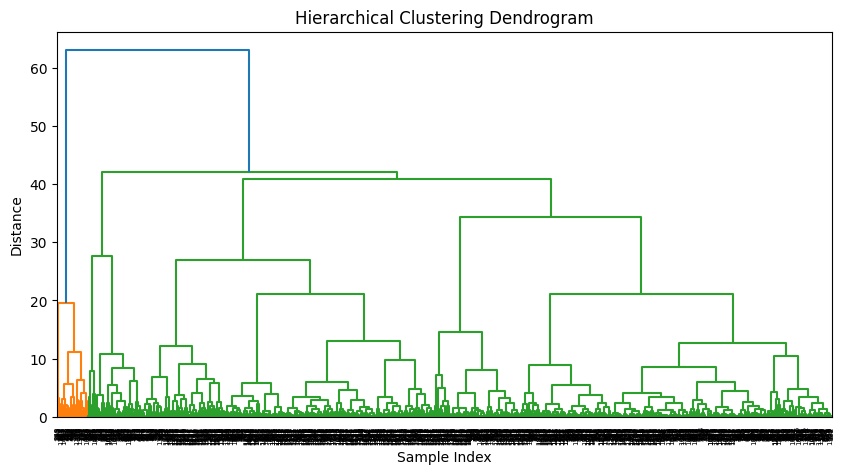

In [15]:
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()
